# __Import Libraries__

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')

# __Load Dataset__

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.duplicated().sum()

12

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank1 = bank.copy()

# __Drop Duration__

In [7]:
bank1 = bank1.drop(columns=['duration'])

# __Drop Unknown__

In [8]:
columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

for i in columns:
    bank1.drop(index=bank1[bank1[i] == 'unknown'].index, inplace=True)

In [9]:
bank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# __Drop Outliers__

In [11]:
def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

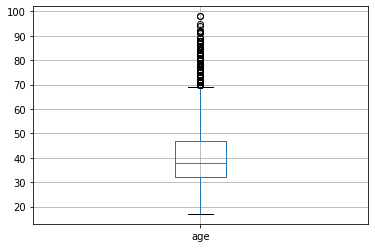

Median = 38.0
IQR = 15.0
Batas Bawah = 9.5
Batas Atas = 69.5
Jumlah Outlier = 469
Outlier = [70, 76, 73, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 95, 70, 70, 70, 77, 75, 70, 70, 73, 80, 80, 80, 72, 72, 82, 73, 71, 70, 70, 70, 71, 70, 70, 71, 75, 73, 73, 71, 75, 75, 78, 75, 70, 78, 75, 78, 85, 85, 85, 80, 71, 85, 85, 79, 77, 83, 81, 71, 81, 73, 71, 71, 88, 81, 81, 81, 71, 83, 75, 78, 88, 77, 72, 79, 79, 74, 75, 72, 72, 70, 79, 74, 74, 74, 74, 76, 76, 82, 75, 70, 73, 73, 73, 73, 76, 70, 85, 80, 70, 74, 74, 76, 88, 74, 81, 76, 74, 76, 73, 72, 70, 71, 70, 70, 76, 72, 73, 80, 74, 71, 74, 80, 74, 73, 74, 71, 76, 76, 87, 79, 70, 74, 88, 81, 80, 80, 78, 71, 71, 72, 73, 73, 73, 79, 72, 71, 83, 76, 76, 72, 71, 71, 76, 75, 71, 78, 78, 91, 91, 76, 73, 76, 73, 71, 83, 70, 70, 70, 70, 70, 70, 70, 81, 70, 70, 78, 71, 71, 75, 83, 71, 82, 82, 82, 80, 80, 86, 77, 75, 77, 70, 80, 71, 71, 71, 80, 80, 71, 71, 74, 74, 74, 83, 85, 70, 70, 70, 88, 88, 71, 98, 98, 73, 72, 71, 71, 81, 71, 75, 81, 73,

In [12]:
bank.boxplot(['age'])
plt.savefig('Age Boxplot.png')
plt.show()
    
q1 = bank['age'].describe()['25%']
q2 = bank['age'].describe()['50%']
q3 = bank['age'].describe()['75%']
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

print("Median =", bank['age'].describe()['50%'])
print("IQR =", (bank['age'].describe()['75%']) - (bank['age'].describe()['25%']))
print("Batas Bawah =", batas_bawah)
print("Batas Atas =", batas_atas)
print("Jumlah Outlier =", len(find_outlier(bank['age'])))
print("Outlier =", find_outlier(bank['age']))


In [13]:
bank2 = bank1[bank1['age'] < 69.5]
bank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [14]:
bank2.to_csv('bank.csv')

# __Encoding__

In [15]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
bank2['job']      = labelencoder_X.fit_transform(bank2['job'])
bank2['default']  = labelencoder_X.fit_transform(bank2['default']) 
bank2['housing']  = labelencoder_X.fit_transform(bank2['housing']) 
bank2['loan']     = labelencoder_X.fit_transform(bank2['loan']) 
bank2['contact']  = labelencoder_X.fit_transform(bank2['contact']) 
bank2['marital']  = labelencoder_X.fit_transform(bank2['marital']) 

In [16]:
bank2['education'].replace(['basic.4y', 'basic.6y','basic.9y', 'high.school', 'university.degree', 'professional.course','illiterate'], [1,2,3,4,5,6,7], inplace  = True)

In [17]:
bank2['month'].replace(['jan','feb','mar', 'apr','may', 'jun', 'jul','aug', 'sep','oct', 'nov', 'dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace  = True)

In [18]:
bank2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5], inplace  = True)

In [19]:
bank2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [20]:
bank2['y'].replace(['no','yes'], [0,1], inplace  = True)

In [21]:
bank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,1,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,1,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,6,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,5,0,1,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,1,0,1,0,0,11,5,1,9,1,3,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,5,0,1,0,0,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


### __Scaling__

In [22]:
kolom = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [23]:
for i in kolom:
    bank2[i] = RobustScaler().fit_transform(bank2[[i]])

In [24]:
bank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.428571,0.142857,0.0,-1.5,0.0,-1.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000275,0.000000,0
2,0.071429,0.714286,0.0,0.0,0.0,0.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000275,0.000000,0
3,0.285714,-0.285714,0.0,-1.0,0.0,-1.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000275,0.000000,0
4,1.428571,0.714286,0.0,0.0,0.0,-1.0,1.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000275,0.000000,0
6,1.642857,-0.285714,0.0,1.0,0.0,-1.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000275,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0.071429,-0.285714,0.0,0.5,0.0,0.0,0.0,0.0,1.666667,1.0,-0.5,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.053385,-1.762791,1
41182,-0.500000,1.142857,1.0,-1.5,0.0,0.0,0.0,0.0,1.666667,1.0,-0.5,-990.0,1.0,2.0,-0.6875,1.439608,-1.428571,-1.053385,-1.762791,0
41184,0.714286,-0.142857,0.0,1.0,0.0,-1.0,0.0,0.0,1.666667,1.0,-0.5,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.053385,-1.762791,0
41185,1.428571,0.428571,0.0,0.5,0.0,0.0,0.0,0.0,1.666667,1.0,0.0,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.053385,-1.762791,0


### **Features Selection**

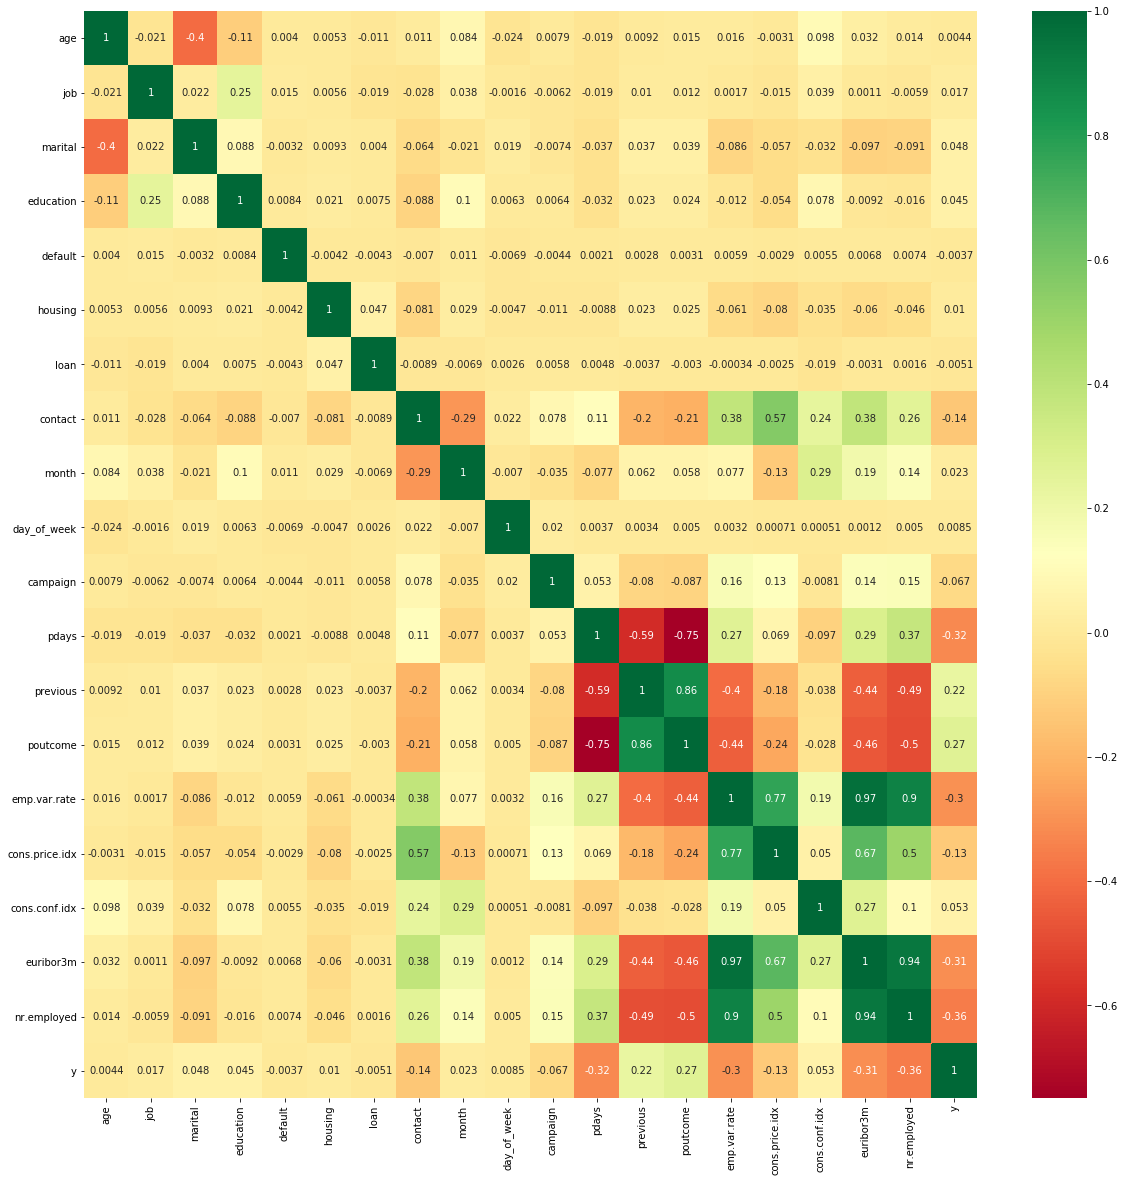

In [25]:
#get correlations of each features in dataset
corrmat = bank2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(bank2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
bank2 = bank2.drop(columns=['emp.var.rate', 'euribor3m'])

In [27]:
x = bank2.drop(['y'], axis=1)
y = bank2['y']

In [28]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[2.17090820e-01 9.46421352e-02 3.94883695e-02 8.16467796e-02
 1.56867661e-06 3.15845800e-02 2.24019565e-02 1.72503243e-02
 2.74353969e-02 9.11919950e-02 1.16151156e-01 6.79269988e-02
 1.53170558e-02 2.81212997e-02 3.25338806e-02 3.75847636e-02
 7.96309206e-02]


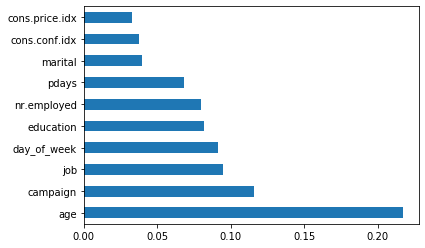

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
# feat_importances

In [30]:
bank3 = bank2[['age','campaign','job','day_of_week', 'nr.employed','education','pdays','marital','poutcome','cons.conf.idx', 'y']]

In [31]:
bank3

,age,campaign,job,day_of_week,nr.employed,education,pdays,marital,poutcome,cons.conf.idx,y
0,1.428571,-0.5,0.142857,-1.0,0.000000,-1.5,0.0,0.0,0.0,0.857143,0
2,0.071429,-0.5,0.714286,-1.0,0.000000,0.0,0.0,0.0,0.0,0.857143,0
3,0.285714,-0.5,-0.285714,-1.0,0.000000,-1.0,0.0,0.0,0.0,0.857143,0
4,1.428571,-0.5,0.714286,-1.0,0.000000,0.0,0.0,0.0,0.0,0.857143,0
6,1.642857,-0.5,-0.285714,-1.0,0.000000,1.0,0.0,0.0,0.0,0.857143,0
...,...,...,...,...,...,...,...,...,...,...,...
41181,0.071429,-0.5,-0.285714,1.0,-1.762791,0.5,0.0,0.0,0.0,-1.428571,1
41182,-0.500000,-0.5,1.142857,1.0,-1.762791,-1.5,-990.0,1.0,2.0,-1.428571,0
41184,0.714286,-0.5,-0.142857,1.0,-1.762791,1.0,0.0,0.0,0.0,-1.428571,0
41185,1.428571,0.0,0.428571,1.0,-1.762791,0.5,0.0,0.0,0.0,-1.428571,0


### __Splitting Dataset__

In [32]:
x = bank3.drop(['y'], axis=1)
y = bank3['y']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

## **Handling Imbalance Target**

### **Check Target Proportion**

In [34]:
bank3['y'].value_counts()

0    26422
1     3689
Name: y, dtype: int64

In [35]:
x = [round(i/len(bank3)*100, 2) for i in bank3['y'].value_counts()]
pd.DataFrame(data=x, index=['No', 'Yes'], columns=['Data (%)'])

,Data (%)
No,87.75
Yes,12.25


## __Oversampling : SMOTE__

In [36]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

## __Building Machine Learning__

In [37]:
# menyimpan model algoritma ke dalam variabel 'models'
models = [
    ['Logistic Regression : ', LogisticRegression()],
    ['DecisionTree : ', DecisionTreeClassifier()],
    ['RandomForest : ', RandomForestClassifier()],
    ['KNeighbors Classifier : ', KNeighborsClassifier()]
]

LogisticRegression()
 
               Score (%)
accuracy       74.136786
recall         72.797927
precision      29.424084
roc_auc_score  73.565757
f1_score       41.909023
 
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2626
           1       0.29      0.73      0.42       386

    accuracy                           0.74      3012
   macro avg       0.62      0.74      0.63      3012
weighted avg       0.87      0.74      0.78      3012



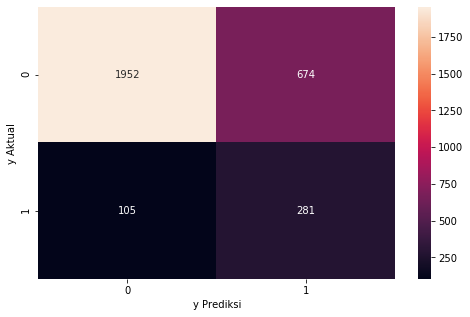

DecisionTreeClassifier()
 
               Score (%)
accuracy       82.304117
recall         33.160622
precision      31.761787
roc_auc_score  61.344210
f1_score       32.446134
 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2626
           1       0.32      0.33      0.32       386

    accuracy                           0.82      3012
   macro avg       0.61      0.61      0.61      3012
weighted avg       0.83      0.82      0.82      3012



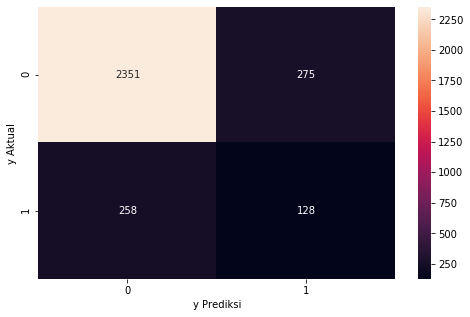

RandomForestClassifier()
 
               Score (%)
accuracy       86.420983
recall         36.269430
precision      46.204620
roc_auc_score  65.031135
f1_score       40.638607
 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2626
           1       0.46      0.36      0.41       386

    accuracy                           0.86      3012
   macro avg       0.69      0.65      0.66      3012
weighted avg       0.85      0.86      0.86      3012



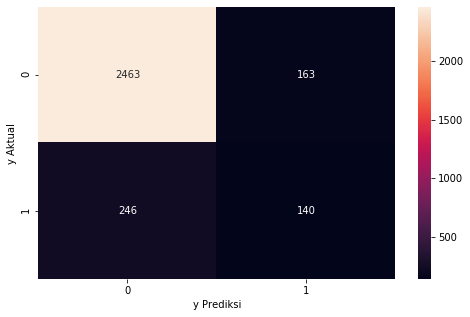

KNeighborsClassifier()
 
               Score (%)
accuracy       74.169987
recall         61.658031
precision      27.419355
roc_auc_score  68.833585
f1_score       37.958533
 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2626
           1       0.27      0.62      0.38       386

    accuracy                           0.74      3012
   macro avg       0.60      0.69      0.61      3012
weighted avg       0.85      0.74      0.78      3012



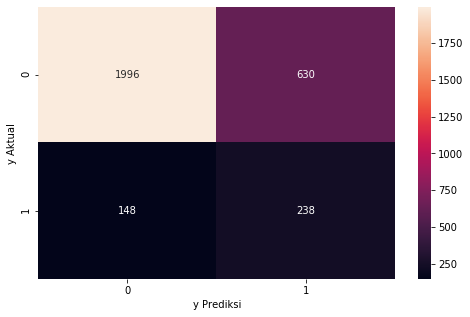

In [38]:
for name, model in models:
    model = model
     # model belajar dari data train
    model.fit(x_train_sm, y_train_sm)
    # membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
    y_pred = model.predict(X_test)
    
    hasil = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                        precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                        f1_score(y_test, y_pred)*100],
                        index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
                        columns = ['Score (%)'])
    print(model)
    print(" ")
    print(hasil)
    print(" ")
    # Confusion matrix report
    print(classification_report(y_test, y_pred))
    # untuk menampilkan visualisasi confusion matrix
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()

# __Hyperparameter Tuning : Grid Search__

## __Logistic Regression__

In [39]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [49]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5, scoring=make_scorer(f1_score))

In [50]:
model_LR_GS.fit(x_train_sm, y_train_sm)
model_LR_GS.best_params_

{'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

In [51]:
model_LogReg_GS = LogisticRegression(solver='newton-cg', penalty = 'l2', max_iter = 10)
model_LogReg_GS.fit(x_train_sm, y_train_sm)

LogisticRegression(max_iter=10, solver='newton-cg')

In [52]:
y_pred_GS = model_LogReg_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,71.679947
recall,74.870466
precision,27.655502
roc_auc_score,73.040717
f1_score,40.391335


              precision    recall  f1-score   support

           0       0.95      0.71      0.81      2626
           1       0.28      0.75      0.40       386

    accuracy                           0.72      3012
   macro avg       0.61      0.73      0.61      3012
weighted avg       0.86      0.72      0.76      3012



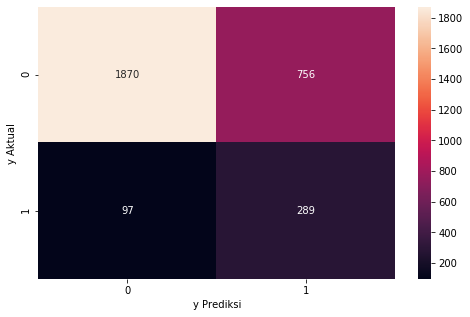

In [53]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

## __Random Forest Classifier__

In [54]:
# parameter model Random Forest Classifier yang akan dituned + value di setiap parameter

bootstrap = [True, False]
max_features = ['auto', 'sqrt', 'log2']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]


# simpan dalam variabel dengan nama 'param'
param = {'bootstrap': bootstrap,
 'max_features': max_features, 
 'min_samples_leaf': min_samples_leaf,
 'min_samples_split': min_samples_split}
param

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [55]:
model_RF =  RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv = 5,scoring=make_scorer(f1_score))

In [56]:
model_RF_GS.fit(x_train_sm, y_train_sm)
model_RF_GS.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [57]:
model_RF_GS = RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2, min_samples_split=5)
model_RF_GS.fit(x_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5)

In [58]:
y_pred_GS = model_RF_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,87.051793
recall,37.305699
precision,49.315068
roc_auc_score,65.834876
f1_score,42.477876


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2626
           1       0.49      0.37      0.42       386

    accuracy                           0.87      3012
   macro avg       0.70      0.66      0.68      3012
weighted avg       0.86      0.87      0.86      3012



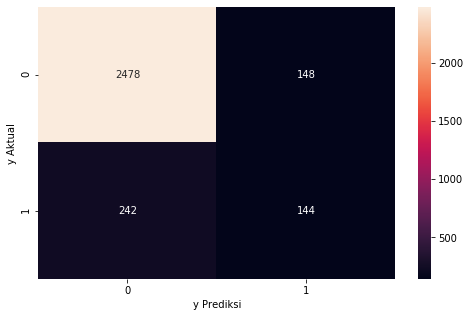

In [59]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

## __Decision Tree Classifier__

In [60]:
# parameter model decision tree yang akan dituned + value di setiap parameter
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 5, 10, 20, 50, 100]
max_depth = [4,6,8,12]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}
param

{'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100],
 'max_depth': [4, 6, 8, 12]}

In [61]:
model_DT = DecisionTreeClassifier()
model_DT_GS = GridSearchCV(model_DT, param, cv = 5,scoring=make_scorer(f1_score))

In [62]:
model_DT_GS.fit(x_train_sm, y_train_sm)
model_DT_GS.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [63]:
model_DT_GS = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 2, criterion = 'entropy')
model_DT_GS.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [64]:
y_pred_GS = model_DT_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,85.424967
recall,50.000000
precision,43.963554
roc_auc_score,70.316070
f1_score,46.787879


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2626
           1       0.44      0.50      0.47       386

    accuracy                           0.85      3012
   macro avg       0.68      0.70      0.69      3012
weighted avg       0.86      0.85      0.86      3012



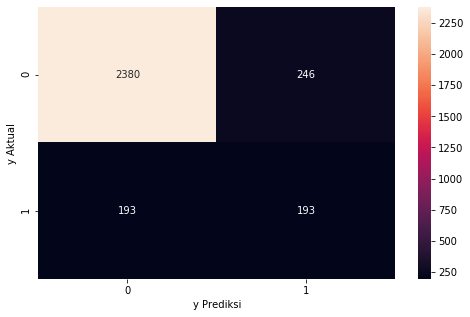

In [65]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

## __KNeighbors Classifier__

## __Deciding K Value__
Berapa nilai K (jumlah tetangga) yang digunakan untuk memprediksi suatu data?

1. sqrt(n) : akar pangkat 2 dari total data training
2. pilih nilai yang ganjil

In [66]:
# misalnya hasilnya genap, perlu ditambah + 1
k = round(len(x_train_sm) ** 0.5)
k

218

In [67]:
# parameter model yang akan dituned + value di setiap parameter

p = [1,2]
metric = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform', 'distance']


# simpan dalam variabel dengan nama 'param'
param = {'p': p, 'metric': metric, 'weights':weights}
param

{'p': [1, 2],
 'metric': ['euclidean', 'manhattan', 'minkowski'],
 'weights': ['uniform', 'distance']}

In [68]:
model_k = KNeighborsClassifier()
model_k_GS = GridSearchCV(model_k, param, cv = 5,scoring=make_scorer(f1_score))

In [69]:
model_k_GS.fit(x_train_sm, y_train_sm)
model_k_GS.best_params_

{'metric': 'manhattan', 'p': 1, 'weights': 'distance'}

In [70]:
model_k_GS = KNeighborsClassifier(n_neighbors = 219, leaf_size=1000, p=1, metric='manhattan', weights='distance')
model_k_GS.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=1000, metric='manhattan', n_neighbors=219, p=1,
                     weights='distance')

In [71]:
y_pred_GS = model_k_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.673307
recall,62.176166
precision,37.151703
roc_auc_score,73.357694
f1_score,46.511628


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2626
           1       0.37      0.62      0.47       386

    accuracy                           0.82      3012
   macro avg       0.65      0.73      0.68      3012
weighted avg       0.87      0.82      0.84      3012



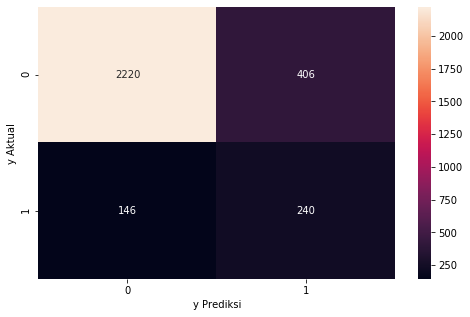

In [72]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

<hr>

# **``Saving Model``**

# __Encoding__

In [85]:
bank4 = bank1.copy()

In [86]:
bank4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [87]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
bank4['job']      = labelencoder_X.fit_transform(bank4['job'])
bank4['default']  = labelencoder_X.fit_transform(bank4['default']) 
bank4['housing']  = labelencoder_X.fit_transform(bank4['housing']) 
bank4['loan']     = labelencoder_X.fit_transform(bank4['loan']) 
bank4['contact']  = labelencoder_X.fit_transform(bank4['contact']) 
bank4['marital']  = labelencoder_X.fit_transform(bank4['marital']) 

In [88]:
bank4['education'].replace(['basic.4y', 'basic.6y','basic.9y', 'high.school', 'university.degree', 'professional.course','illiterate'], [1,2,3,4,5,6,7], inplace  = True)

In [89]:
bank4['month'].replace(['jan','feb','mar', 'apr','may', 'jun', 'jul','aug', 'sep','oct', 'nov', 'dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace  = True)

In [90]:
bank4['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5], inplace  = True)

In [91]:
bank4['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [92]:
bank4['y'].replace(['no','yes'], [0,1], inplace  = True)

In [93]:
bank4.shape

(30488, 20)

In [94]:
bank4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,1,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,1,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,6,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,5,0,1,0,0,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [95]:
bank5 = bank4[['age','campaign','job','day_of_week', 'nr.employed','education','pdays','marital','poutcome','cons.conf.idx', 'y']]
bank5

,age,campaign,job,day_of_week,nr.employed,education,pdays,marital,poutcome,cons.conf.idx,y
0,56,1,3,1,5191.0,1,999,1,1,-36.4,0
2,37,1,7,1,5191.0,4,999,1,1,-36.4,0
3,40,1,0,1,5191.0,2,999,1,1,-36.4,0
4,56,1,7,1,5191.0,4,999,1,1,-36.4,0
6,59,1,0,1,5191.0,6,999,1,1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,5,5,4963.6,6,999,1,1,-50.8,1
41184,46,1,1,5,4963.6,6,999,1,1,-50.8,0
41185,56,2,5,5,4963.6,5,999,1,1,-50.8,0
41186,44,1,9,5,4963.6,6,999,1,1,-50.8,1


### __Splitting Dataset__

In [96]:
x = bank5.drop(['y'], axis=1)
y = bank5['y']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

## __Over Sampling : SMOTE__

In [98]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [99]:
model_DT_GS_noscale = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 2, criterion = 'entropy')
model_DT_GS_noscale.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [100]:
y_pred_GS = model_DT_GS_noscale.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,80.813381
recall,56.521739
precision,32.859400
roc_auc_score,70.334723
f1_score,41.558442


              precision    recall  f1-score   support

           0       0.93      0.84      0.89      2681
           1       0.33      0.57      0.42       368

    accuracy                           0.81      3049
   macro avg       0.63      0.70      0.65      3049
weighted avg       0.86      0.81      0.83      3049



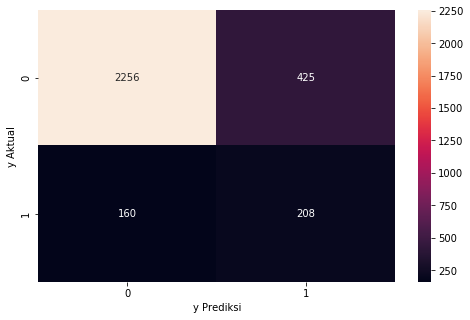

In [101]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [102]:
columns=['age','campaign','nr.employed','pdays','cons.conf.idx']

for i in columns:
    print("Min ", i, bank4[i].min())
    print("Max ", i, bank4[i].max())
    
columns2=['job','day_of_week', 'education','marital','poutcome']
for i in columns2:
    print("Unique Value", i, bank2[i].unique())

Min  age 17
Max  age 95
Min  campaign 1
Max  campaign 43
Min  nr.employed 4963.6
Max  nr.employed 5228.1
Min  pdays 0
Max  pdays 999
Min  cons.conf.idx -50.8
Max  cons.conf.idx -26.9
Unique Value job [ 0.14285714  0.71428571 -0.28571429  1.         -0.14285714  1.14285714
  0.42857143  0.          0.28571429  0.85714286  0.57142857]
Unique Value day_of_week [-1.  -0.5  0.   0.5  1. ]
Unique Value education [-1.5  0.  -1.   1.  -0.5  0.5  1.5]
Unique Value marital [ 0.  1. -1.]
Unique Value poutcome [0. 1. 2.]


<hr>

# **``Saving Model``**

### **1. Saving Model using Joblib**

In [103]:
# menyimpan model
import joblib

joblib.dump(model_DT_GS_noscale, 'model_DT_Joblib')

['model_DT_Joblib']

### **2. Using Joblib Model**

In [104]:
# simulasi menggunakan model

model_joblib = joblib.load('model_DT_Joblib')

# user input data

age = int(input('Ketik Age (17-69): '))
campaign = int(input('Ketik Campaign (1-43): '))
number_of_employees = int(input('Ketik Number of Employees (4963-5228): '))
job = int(input('Ketik Job (0=admin, 1=blue-collar, 2=entrepreneur, 3=housemaid, 4=management, 5=retired, 6=self-employed, 7=services, 8=student, 9=technician, 10=unemployed): '))
day_of_week = int(input('Ketik Day of Week (1=mon, 2=tue, 3=wed, 4=thu, 5=fri]): '))
education = int(input('Ketik Education (1=basic.4y, 2=basic.6y, 3=basic.9y, 4=high.school, 5=university.degree, 6=professional.course,7=illiterate): '))
days_last_contacted = int(input('Ketik Days Last Contacted (0-999): '))
marital = int(input('Marital (0=divorced, 1=married, 2=single): '))
outcome = int(input('Outcome (0=nonexistent, 1=failure, 2=success): '))
Consumer_Confidence_Index = int(input('Consumer Confidence Index ((-51)-(-26)): '))

df = [[age,campaign,job,day_of_week, number_of_employees,education,days_last_contacted,marital,outcome,Consumer_Confidence_Index]]

if model_joblib.predict(df)[0] == 1:
    hasil = 'Subscribe'
else:
    hasil = 'Not Subscribe'

print('Hasil Prediksi: ', hasil)
print('Probabilitas Prediksi: ', round(model_joblib.predict_proba(df).tolist()[0][0]*100, 2))

Ketik Age (17-69):  75
Ketik Campaign (1-43):  42
Ketik Number of Employees (4963-5228):  4968
Ketik Job (0=admin, 1=blue-collar, 2=entrepreneur, 3=housemaid, 4=management, 5=retired, 6=self-employed, 7=services, 8=student, 9=technician, 10=unemployed):  2
Ketik Day of Week (1=mon, 2=tue, 3=wed, 4=thu, 5=fri]):  3
Ketik Education (1=basic.4y, 2=basic.6y, 3=basic.9y, 4=high.school, 5=university.degree, 6=professional.course,7=illiterate):  4
Ketik Days Last Contacted (0-999):  210
Marital (0=divorced, 1=married, 2=single):  1
Outcome (0=nonexistent, 1=failure, 2=success):  2
Consumer Confidence Index ((-51)-(-26)):  -45


Hasil Prediksi:  Not Subscribe
Probabilitas Prediksi:  100.0
